In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score 

In [158]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [159]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

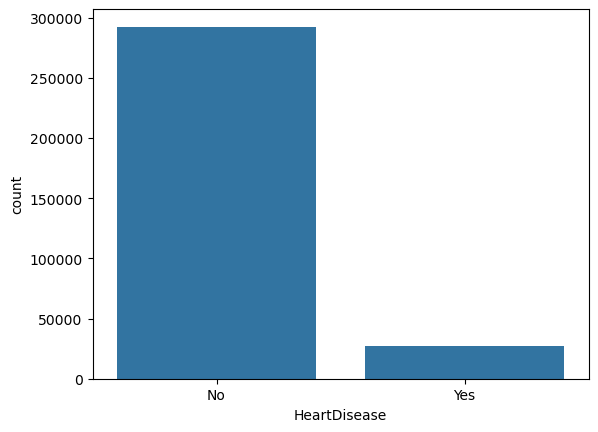

In [160]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [161]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 245212,
 'Hispanic': 27446,
 'Black': 22939,
 'Other': 10928,
 'Asian': 8068,
 'American Indian/Alaskan Native': 5202}

In [162]:
df = df[(df["Race"] == "Hispanic") | (df["Race"] == "Black") | (df["Race"] == "White")]

In [163]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Remove Duplicates

In [164]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (295597, 18)
Duplicates in dataset: 17956


In [165]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (277641, 18)
Duplicates in dataset: 0


## Plot Race Distribution

In [166]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 227724, 'Hispanic': 27107, 'Black': 22810}

<AxesSubplot:xlabel='Race', ylabel='count'>

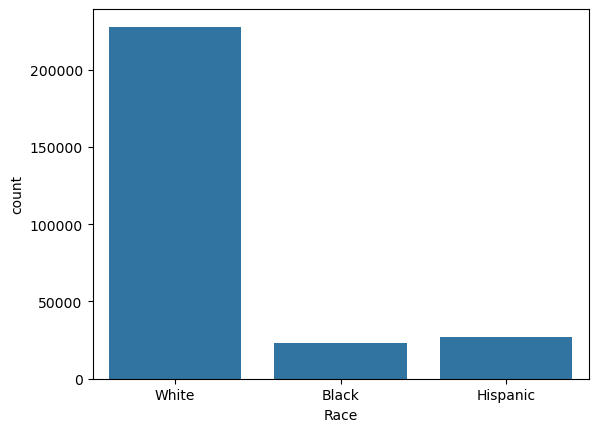

In [167]:
sns.countplot(x = df["Race"])

In [168]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.17978972846229482


In [169]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_1

array([0.82021027, 0.08989486, 0.08989486])

In [170]:
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

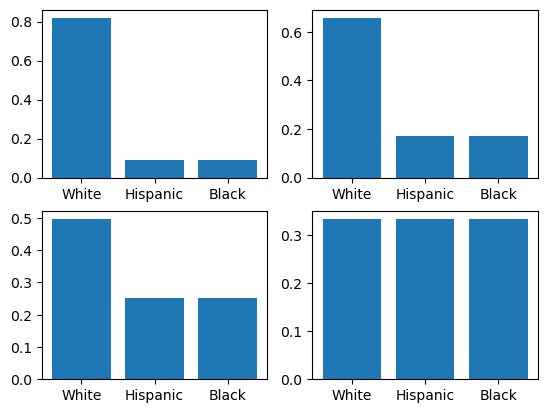

In [171]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

# Encoding

In [172]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,2,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,2,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,2,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,2,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,2,0,1,4,8.0,0,0,0


# Standardization

In [173]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

continuous_vars=df.select_dtypes('float64').columns
cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.844577,1,0,0,-0.071847,3.199271,0,0,7,2,2,1,4,-1.439513,1,0,1
1,0,-1.264836,0,0,1,-0.440025,-0.506278,0,0,12,2,0,1,4,-0.067750,0,0,0
2,0,-0.297567,1,0,0,2.014499,3.199271,0,1,9,2,2,1,1,0.618131,1,0,0
3,0,-0.664943,0,0,0,-0.440025,-0.506278,0,0,11,2,0,0,2,-0.753631,0,0,1
4,0,-0.742448,0,0,0,2.996308,-0.506278,1,0,4,2,0,1,4,0.618131,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.168908,1,0,0,0.419058,-0.506278,1,1,8,1,2,0,1,-0.753631,1,0,0
319791,0,0.207769,1,0,0,-0.440025,-0.506278,0,1,3,1,0,1,4,-1.439513,1,0,0
319792,0,-0.660293,0,0,0,-0.440025,-0.506278,0,0,5,1,0,1,2,-0.753631,0,0,0
319793,0,0.668152,0,0,0,-0.440025,-0.506278,0,0,1,1,0,0,2,3.361655,0,0,0


## Train Test Split

In [174]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [175]:
training_data.size, testing_data.size

(3998016, 999522)

In [176]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.480588,0,0,0,-0.440025,-0.506278,0,1,6,2,0,1,4,0.618131,0,0,0
1,0,-0.437077,0,0,0,-0.440025,-0.506278,0,1,3,2,0,1,0,0.618131,0,0,0
2,0,-0.748649,0,0,0,-0.440025,-0.506278,0,1,2,2,0,1,4,0.618131,1,0,0
3,0,-1.253985,1,0,0,-0.317299,-0.506278,0,0,11,2,0,1,0,-0.067750,0,0,0
4,0,-0.637041,1,1,0,-0.440025,-0.506278,0,1,9,2,0,1,4,-0.753631,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222107,0,-1.588809,1,1,0,-0.071847,1.964088,0,0,0,2,0,1,1,-0.067750,0,0,0
222108,0,-0.491331,0,0,0,-0.440025,-0.259242,0,0,4,2,0,1,4,-0.067750,0,0,0
222109,1,0.669702,1,0,0,-0.440025,-0.506278,0,1,12,2,2,1,1,1.989893,0,0,0
222110,0,0.835564,1,0,0,-0.440025,-0.259242,0,0,9,2,0,1,4,-1.439513,1,0,0


## Balancing "Yes" vs "No" Classes

In [101]:
# class count
class_count_0, class_count_1 = training_data['HeartDisease'].value_counts()

# Separate class
class_0 = training_data[training_data['HeartDisease'] == 0]
class_1 = training_data[training_data['HeartDisease'] == 1]

print('Class 0 [HeartDisease = No]:', class_0.shape)
print('Class 1 [HeartDisease = Yes]:', class_1.shape)

Class 0 [HeartDisease = No]: (201700, 18)
Class 1 [HeartDisease = Yes]: (20412, 18)


Total counts of class 1 and 0:
HeartDisease
0    20412
1    20412
Name: count, dtype: int64


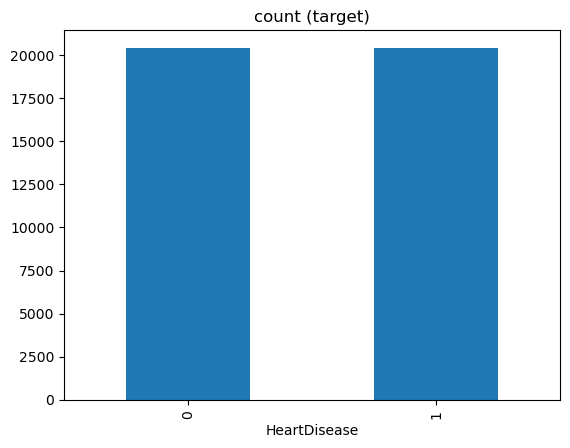

In [102]:
class_0_under = class_0.sample(class_count_1)

training_data= pd.concat([class_0_under, class_1], axis=0)

# plot the count after under-sampling
print("Total counts of class 1 and 0:")
print(training_data['HeartDisease'].value_counts())
training_data['HeartDisease'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [178]:
class_counts = training_data['Race'].value_counts()

In [179]:
class_counts

Race
2    182041
1     21804
0     18267
Name: count, dtype: int64

In [177]:
race = {2: "White", 0: "Hispanic", 1: "Black"}
nums = {"White": 2, "Hispanic": 0, "Black": 1}

In [180]:
counts = training_data['Race'].value_counts()
counts = dict(counts)
counts

total = 0
nonwhite = 0

for race, num in counts.items():
    if race != nums["White"]:
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.18040898285549634


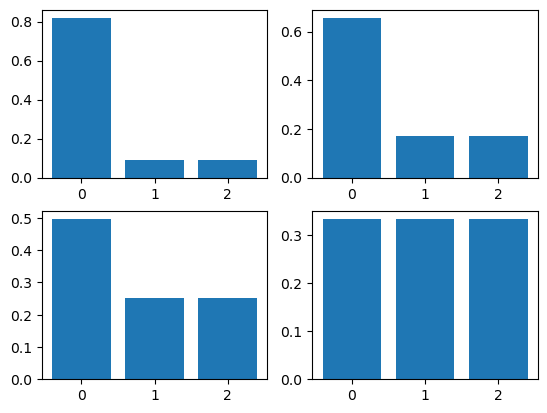

In [181]:
num_races = len(counts.items())

target_dist_1 = np.array([percent_nonwhite / (num_races - 1) for i in range (num_races - 1)] + [1 - (percent_nonwhite)])
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

### 7.1 Random Under-sampling

In [182]:
counts

{2: 182041, 1: 21804, 0: 18267}

In [183]:
min_count_nonwhite = counts[0]
for i in range (num_races - 1):
    min_count_nonwhite = min(min_count_nonwhite, counts[i])

In [184]:
target_dist_1

array([0.09020449, 0.09020449, 0.81959102])

In [185]:
182109 / 9.0

20234.333333333332

In [186]:
min_count_nonwhite = min(min_count_nonwhite, float(counts[nums["White"]] * target_dist_1[0]) / target_dist_1[nums["White"]])
min_count_nonwhite = int(min_count_nonwhite)

min_count_nonwhite

18267

In [187]:
target_dists = [target_dist_1, target_dist_2, target_dist_3, target_dist_4]

In [188]:
count_dists = []
for target_dist in target_dists:
    min_count_nonwhite = counts[0]
    for i in range (num_races - 1):
        min_count_nonwhite = min(min_count_nonwhite, counts[i])
    
    min_count_nonwhite = min(min_count_nonwhite, float(counts[nums["White"]] * target_dist[0]) / target_dist[nums["White"]])
    min_count_nonwhite = int(min_count_nonwhite)

    count_dists.append([int(float(min_count_nonwhite * target_dist[i]) / target_dist[0]) for i in range (num_races)])

In [189]:
count_dists

[[18267, 18267, 165972],
 [18267, 18267, 70136],
 [18267, 18267, 35870],
 [18267, 18267, 18267]]

In [190]:
classes = [training_data[training_data['Race'] == i] for i in range (num_races)]

training_data_list = [training_data]
training_data_list += [pd.concat([classes[i].sample(count_dists[j][i]) for i in range (num_races)], axis=0) for j in range (4)]

Total counts:
Race
2    165972
0     18267
1     18267
Name: count, dtype: int64


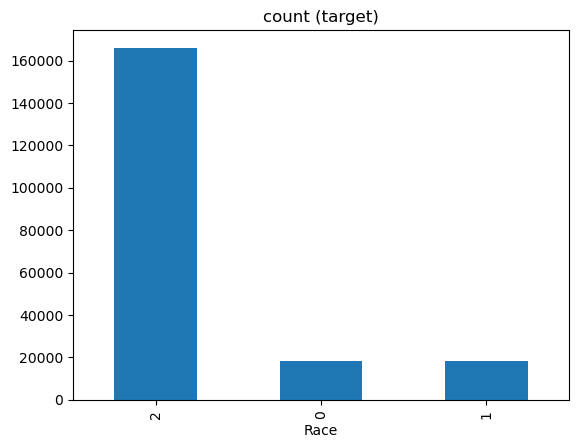

In [191]:
# plot the count after under-sampling
print("Total counts:")
print(training_data_list[1]['Race'].value_counts())
training_data_list[1]['Race'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [192]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']

X_train_list = [training_data.drop(['HeartDisease'], axis=1) for training_data in training_data_list]
y_train_list = [training_data['HeartDisease'] for training_data in training_data_list]

data_desc = ['Imbalanced', 'Undersampling Level 1', 'Undersampling Level 2', 'Undersampling Level 3', 'Undersampling Level 4']

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

222112 training examples
Epoch 1/30
6247/6247 [==============================] - 7s 1ms/step - loss: 0.2582 - accuracy: 0.9059 - val_loss: 0.2524 - val_accuracy: 0.9058
Epoch 2/30
6247/6247 [==============================] - 6s 1ms/step - loss: 0.2458 - accuracy: 0.9083 - val_loss: 0.2503 - val_accuracy: 0.9053
Epoch 3/30
6247/6247 [==============================] - 6s 989us/step - loss: 0.2445 - accuracy: 0.9081 - val_loss: 0.2516 - val_accuracy: 0.9043
Epoch 4/30
6247/6247 [==============================] - 6s 1ms/step - loss: 0.2437 - accuracy: 0.9084 - val_loss: 0.2505 - val_accuracy: 0.9062
Epoch 5/30
6247/6247 [==============================] - 12s 2ms/step - loss: 0.2432 - accuracy: 0.9085 - val_loss: 0.2497 - val_accuracy: 0.9050
Epoch 6/30
6247/6247 [==============================] - 19s 3ms/step - loss: 0.2430 - accuracy: 0.9087 - val_loss: 0.2486 - val_accura

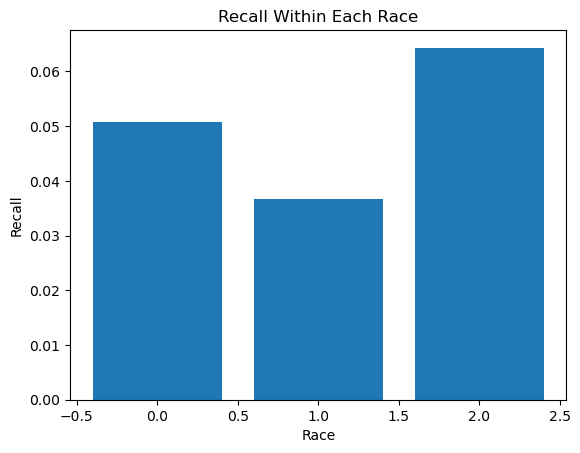

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

202506 training examples
Epoch 1/30
5696/5696 [==============================] - 5s 818us/step - loss: 0.2567 - accuracy: 0.9078 - val_loss: 0.2659 - val_accuracy: 0.8991
Epoch 2/30
5696/5696 [==============================] - 5s 865us/step - loss: 0.2460 - accuracy: 0.9085 - val_loss: 0.2619 - val_accuracy: 0.9010
Epoch 3/30
5696/5696 [==============================] - 5s 838us/step - loss: 0.2445 - accuracy: 0.9088 - val_loss: 0.2613 - val_accuracy: 0.9002
Epoch 4/30
5696/5696 [==============================] - 5s 884us/step - loss: 0.2437 - accuracy: 0.9088 - val_loss: 0.2623 - val_accuracy: 0.9006
Epoch 5/30
5696/5696 [==============================] - 5s 852us/step - loss: 0.2430 - accuracy: 0.9087 - val_loss: 0.2631 - val_accuracy: 0.9006
Epoch 6/30
5696/5696 [==================

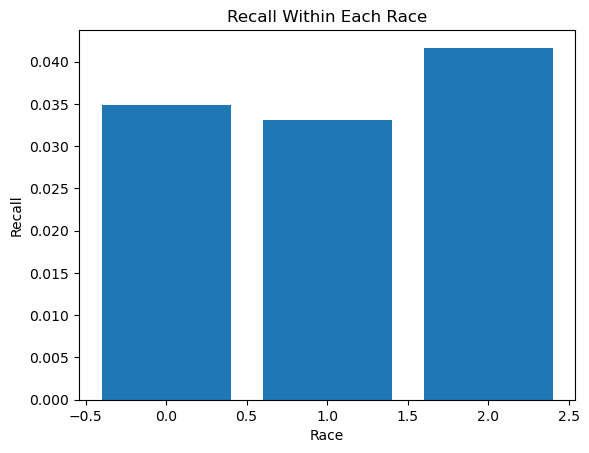

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

106670 training examples
Epoch 1/30
3001/3001 [==============================] - 3s 1ms/step - loss: 0.2630 - accuracy: 0.9082 - val_loss: 0.2592 - val_accuracy: 0.9034
Epoch 2/30
3001/3001 [==============================] - 3s 856us/step - loss: 0.2383 - accuracy: 0.9134 - val_loss: 0.2564 - val_accuracy: 0.9037
Epoch 3/30
3001/3001 [==============================] - 3s 846us/step - loss: 0.2359 - accuracy: 0.9138 - val_loss: 0.2569 - val_accuracy: 0.9038
Epoch 4/30
3001/3001 [==============================] - 2s 779us/step - loss: 0.2345 - accuracy: 0.9139 - val_loss: 0.2567 - val_accuracy: 0.9045
Epoch 5/30
3001/3001 [==============================] - 2s 831us/step - loss: 0.2340 - accuracy: 0.9135 - val_loss: 0.2530 - val_accuracy: 0.9047
Epoch 6/30
3001/3001 [====================

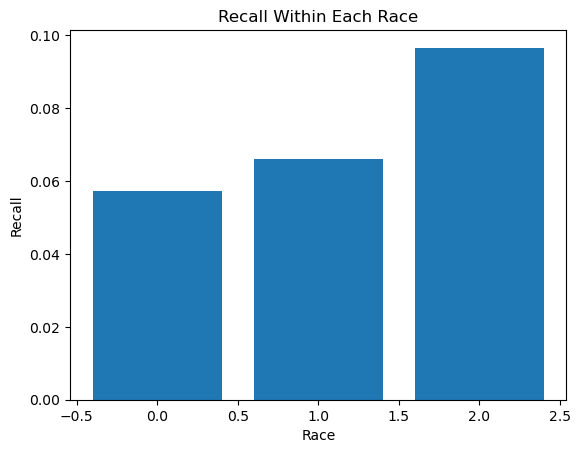

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

72404 training examples
Epoch 1/30
2037/2037 [==============================] - 2s 797us/step - loss: 0.2447 - accuracy: 0.9197 - val_loss: 0.2632 - val_accuracy: 0.8971
Epoch 2/30
2037/2037 [==============================] - 2s 803us/step - loss: 0.2247 - accuracy: 0.9210 - val_loss: 0.2595 - val_accuracy: 0.8978
Epoch 3/30
2037/2037 [==============================] - 2s 813us/step - loss: 0.2229 - accuracy: 0.9212 - val_loss: 0.2577 - val_accuracy: 0.8982
Epoch 4/30
2037/2037 [==============================] - 2s 787us/step - loss: 0.2221 - accuracy: 0.9212 - val_loss: 0.2586 - val_accuracy: 0.8964
Epoch 5/30
2037/2037 [==============================] - 2s 828us/step - loss: 0.2210 - accuracy: 0.9214 - val_loss: 0.2574 - val_accuracy: 0.8984
Epoch 6/30
2037/2037 [===================

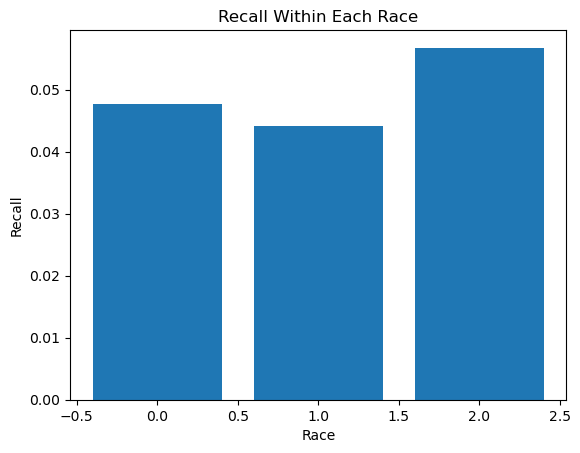

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (UNDERSAMPLING LEVEL 4):

54801 training examples
Epoch 1/30
1542/1542 [==============================] - 2s 871us/step - loss: 0.2564 - accuracy: 0.9170 - val_loss: 0.2783 - val_accuracy: 0.8949
Epoch 2/30
1542/1542 [==============================] - 1s 819us/step - loss: 0.2199 - accuracy: 0.9245 - val_loss: 0.2727 - val_accuracy: 0.8967
Epoch 3/30
1542/1542 [==============================] - 1s 784us/step - loss: 0.2163 - accuracy: 0.9246 - val_loss: 0.2696 - val_accuracy: 0.8989
Epoch 4/30
1542/1542 [==============================] - 1s 831us/step - loss: 0.2144 - accuracy: 0.9243 - val_loss: 0.2703 - val_accuracy: 0.8978
Epoch 5/30
1542/1542 [==============================] - 1s 795us/step - loss: 0.2133 - accuracy: 0.9251 - val_loss: 0.2694 - val_accuracy: 0.8960
Epoch 6/30
1542/1542 [===================

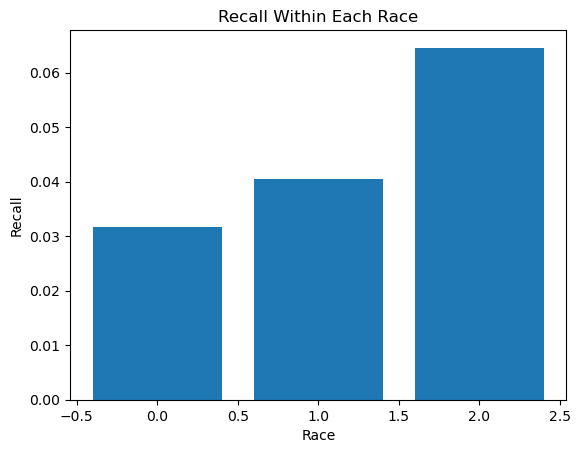

---------------------------------------------------------------------------


In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_list[i].shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_list[i], y_train_list[i], epochs=30, batch_size=32, validation_split=0.1)

    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = model.predict(X_test).squeeze()
    pred = (pred > 0.5).astype(int)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Recall')
    plt.title('Recall Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

222112 training examples
Epoch 1/30
6247/6247 [==============================] - 3s 469us/step - loss: 0.2585 - accuracy: 0.9066 - val_loss: 0.2566 - val_accuracy: 0.9043
Epoch 2/30
6247/6247 [==============================] - 3s 454us/step - loss: 0.2456 - accuracy: 0.9083 - val_loss: 0.2499 - val_accuracy: 0.9060
Epoch 3/30
6247/6247 [==============================] - 3s 490us/step - loss: 0.2439 - accuracy: 0.9085 - val_loss: 0.2522 - val_accuracy: 0.9054
Epoch 4/30
6247/6247 [==============================] - 3s 459us/step - loss: 0.2432 - accuracy: 0.9087 - val_loss: 0.2489 - val_accuracy: 0.9060
Epoch 5/30
6247/6247 [==============================] - 3s 496us/step - loss: 0.2429 - accuracy: 0.9086 - val_loss: 0.2492 - val_accuracy: 0.9061
Epoch 6/30
6247/6247 [==============================] - 3s 479us/step - loss: 0.2426 - accuracy: 0.9088 - val_loss: 0.2486 - va

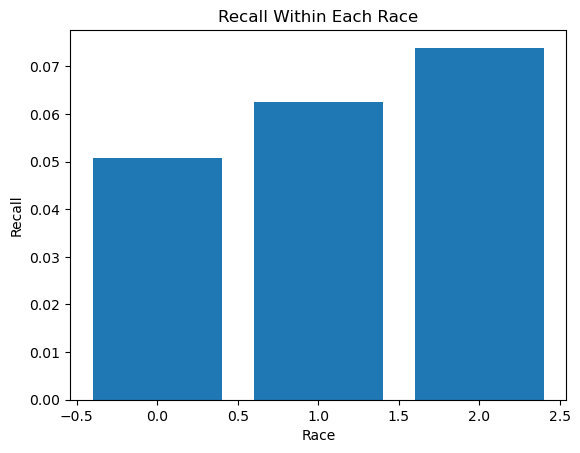

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

202506 training examples
Epoch 1/30
5696/5696 [==============================] - 3s 464us/step - loss: 0.2569 - accuracy: 0.9082 - val_loss: 0.2636 - val_accuracy: 0.9005
Epoch 2/30
5696/5696 [==============================] - 3s 449us/step - loss: 0.2454 - accuracy: 0.9087 - val_loss: 0.2615 - val_accuracy: 0.9003
Epoch 3/30
5696/5696 [==============================] - 3s 449us/step - loss: 0.2442 - accuracy: 0.9091 - val_loss: 0.2612 - val_accuracy: 0.9007
Epoch 4/30
5696/5696 [==============================] - 3s 463us/step - loss: 0.2436 - accuracy: 0.9089 - val_loss: 0.2613 - val_accuracy: 0.9005
Epoch 5/30
5696/5696 [==============================] - 3s 450us/step - loss: 0.2428 - accuracy: 0.9091 - val_loss: 0.2627 - val_accuracy: 0.8982
Epoch 6/30
5696/5696 [==================

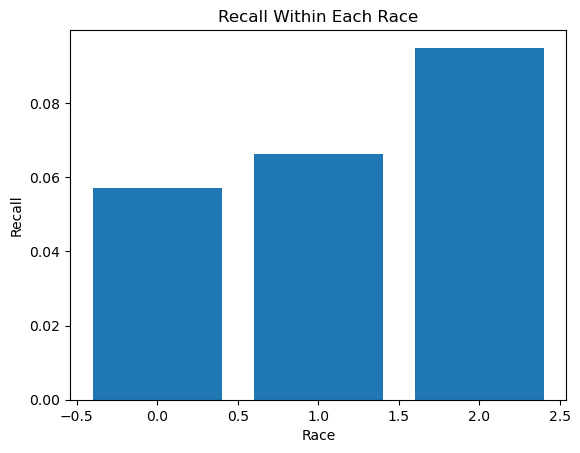

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

106670 training examples
Epoch 1/30
3001/3001 [==============================] - 2s 471us/step - loss: 0.2719 - accuracy: 0.9051 - val_loss: 0.2620 - val_accuracy: 0.9040
Epoch 2/30
3001/3001 [==============================] - 1s 457us/step - loss: 0.2383 - accuracy: 0.9136 - val_loss: 0.2558 - val_accuracy: 0.9040
Epoch 3/30
3001/3001 [==============================] - 1s 450us/step - loss: 0.2354 - accuracy: 0.9139 - val_loss: 0.2543 - val_accuracy: 0.9041
Epoch 4/30
3001/3001 [==============================] - 1s 446us/step - loss: 0.2344 - accuracy: 0.9142 - val_loss: 0.2537 - val_accuracy: 0.9040
Epoch 5/30
3001/3001 [==============================] - 1s 459us/step - loss: 0.2337 - accuracy: 0.9139 - val_loss: 0.2556 - val_accuracy: 0.9047
Epoch 6/30
3001/3001 [==================

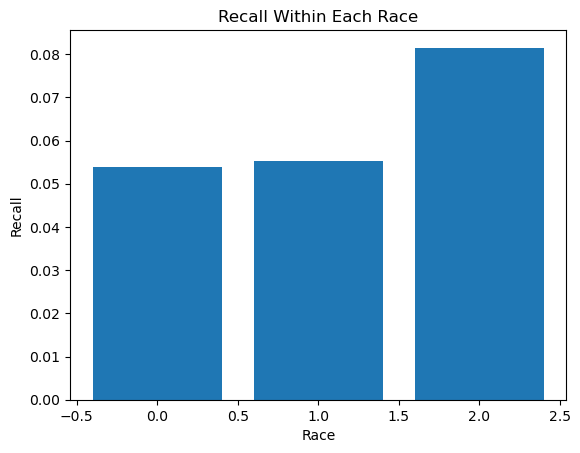

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

72404 training examples
Epoch 1/30
2037/2037 [==============================] - 1s 506us/step - loss: 0.2828 - accuracy: 0.9005 - val_loss: 0.2707 - val_accuracy: 0.8975
Epoch 2/30
2037/2037 [==============================] - 1s 451us/step - loss: 0.2260 - accuracy: 0.9211 - val_loss: 0.2640 - val_accuracy: 0.8984
Epoch 3/30
2037/2037 [==============================] - 1s 449us/step - loss: 0.2232 - accuracy: 0.9214 - val_loss: 0.2607 - val_accuracy: 0.8959
Epoch 4/30
2037/2037 [==============================] - 1s 457us/step - loss: 0.2219 - accuracy: 0.9213 - val_loss: 0.2605 - val_accuracy: 0.8970
Epoch 5/30
2037/2037 [==============================] - 1s 466us/step - loss: 0.2209 - accuracy: 0.9212 - val_loss: 0.2596 - val_accuracy: 0.8957
Epoch 6/30
2037/2037 [===================

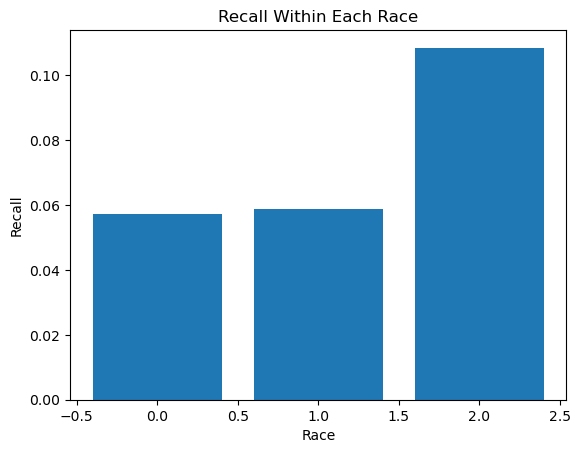

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (UNDERSAMPLING LEVEL 4):

54801 training examples
Epoch 1/30
1542/1542 [==============================] - 1s 498us/step - loss: 0.2481 - accuracy: 0.9226 - val_loss: 0.2730 - val_accuracy: 0.8967
Epoch 2/30
1542/1542 [==============================] - 1s 453us/step - loss: 0.2188 - accuracy: 0.9247 - val_loss: 0.2688 - val_accuracy: 0.8958
Epoch 3/30
1542/1542 [==============================] - 1s 452us/step - loss: 0.2158 - accuracy: 0.9250 - val_loss: 0.2659 - val_accuracy: 0.8971
Epoch 4/30
1542/1542 [==============================] - 1s 455us/step - loss: 0.2145 - accuracy: 0.9255 - val_loss: 0.2666 - val_accuracy: 0.8967
Epoch 5/30
1542/1542 [==============================] - 1s 489us/step - loss: 0.2140 - accuracy: 0.9251 - val_loss: 0.2642 - val_accuracy: 0.8973
Epoch 6/30
1542/1542 [===================

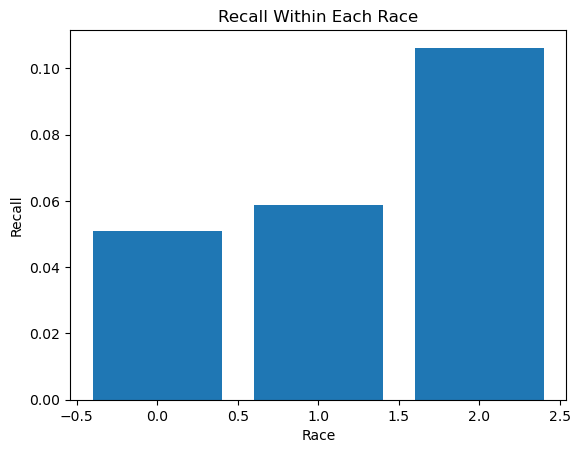

---------------------------------------------------------------------------


In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_list[i].shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_list[i], y_train_list[i], epochs=30, batch_size=32, validation_split=0.1)

    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = model.predict(X_test).squeeze()
    pred = (pred > 0.5).astype(int)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Recall')
    plt.title('Recall Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

In [120]:
from sklearn.metrics import recall_score

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

40824 training examples
[0 0 0 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     50374
           1       0.22      0.76      0.34      5155

    accuracy                           0.73     55529
   macro avg       0.59      0.74      0.59     55529
weighted avg       0.90      0.73      0.78     55529



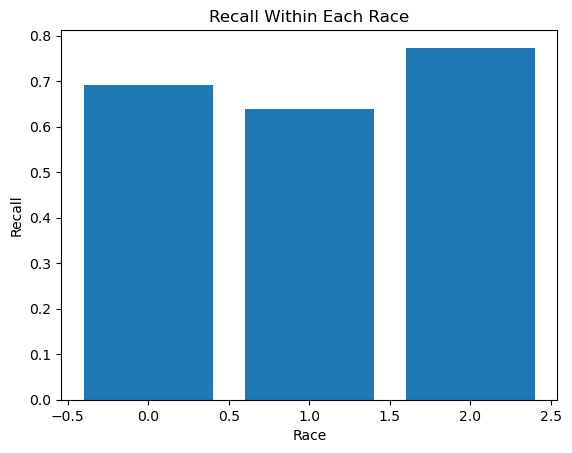

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

39403 training examples
[0 0 0 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     50374
           1       0.22      0.76      0.34      5155

    accuracy                           0.73     55529
   macro avg       0.59      0.74      0.59     55529
weighted avg       0.90      0.73      0.78     55529



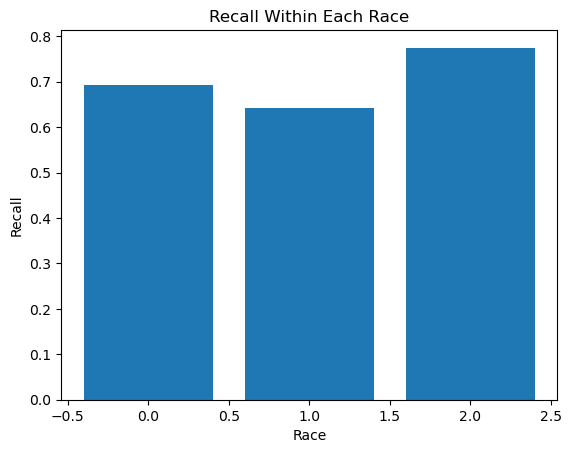

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

18748 training examples
[0 0 0 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     50374
           1       0.22      0.75      0.35      5155

    accuracy                           0.74     55529
   macro avg       0.60      0.74      0.59     55529
weighted avg       0.90      0.74      0.79     55529



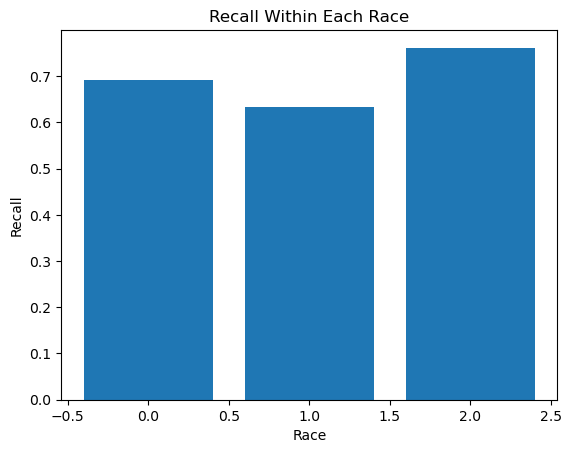

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

12300 training examples
[0 0 0 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     50374
           1       0.22      0.76      0.34      5155

    accuracy                           0.73     55529
   macro avg       0.59      0.74      0.59     55529
weighted avg       0.90      0.73      0.78     55529



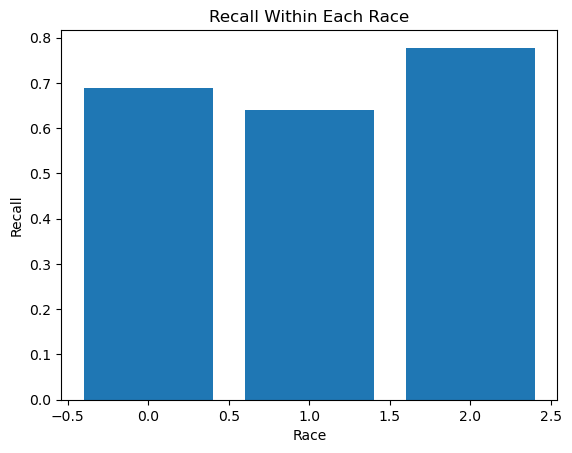

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (UNDERSAMPLING LEVEL 4):

9153 training examples
[0 0 0 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     50374
           1       0.23      0.74      0.35      5155

    accuracy                           0.74     55529
   macro avg       0.60      0.74      0.59     55529
weighted avg       0.90      0.74      0.79     55529



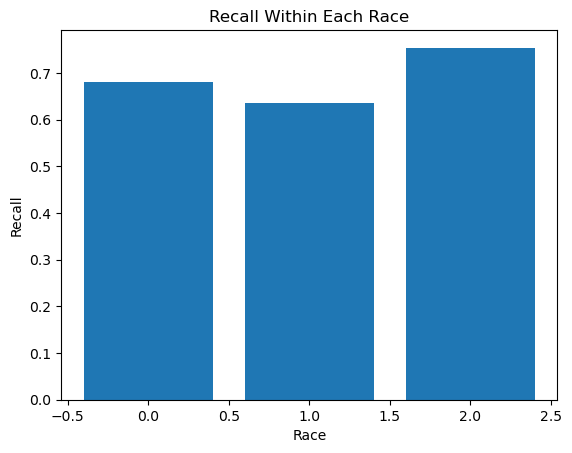

---------------------------------------------------------------------------


In [122]:


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)
    print (pred)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Recall')
    plt.title('Recall Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

40824 training examples
Model accuracy score: 0.7117


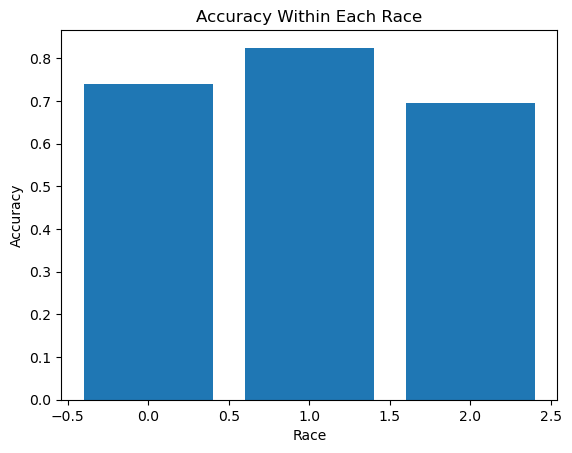

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

39403 training examples
Model accuracy score: 0.7104


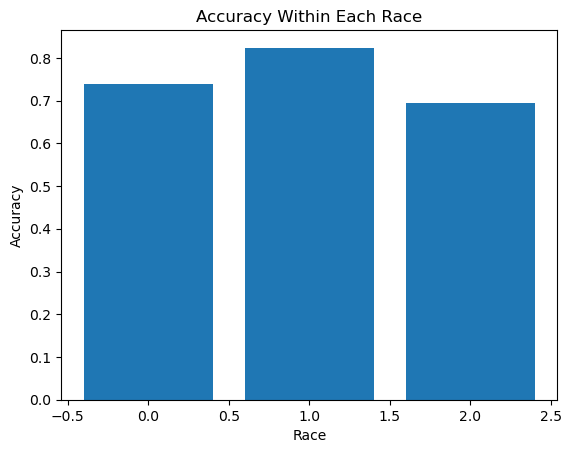

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

18748 training examples
Model accuracy score: 0.7139


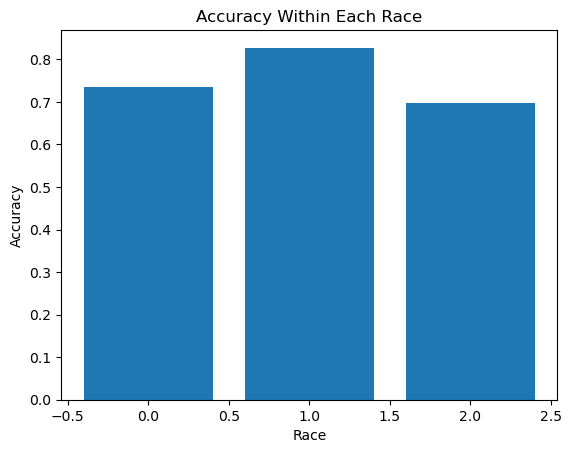

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

12300 training examples
Model accuracy score: 0.7076


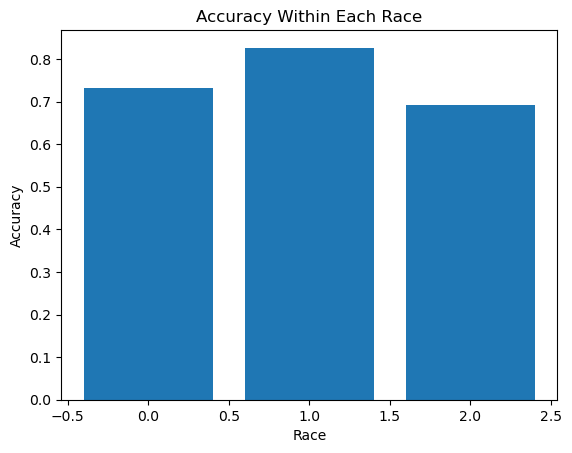

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (UNDERSAMPLING LEVEL 4):

9153 training examples
Model accuracy score: 0.7234


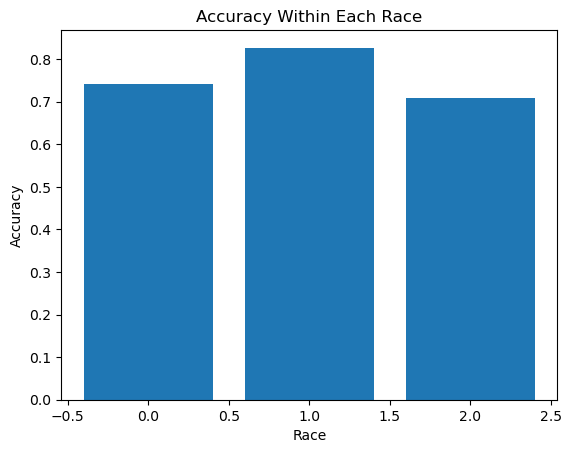

---------------------------------------------------------------------------


In [124]:
from sklearn.ensemble import  RandomForestClassifier

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_RF= RandomForestClassifier().fit(X_train_list[i], y_train_list[i])
        
    pred = clf_RF.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    
    tp_rate_by_race = df.groupby('race').apply(lambda x: accuracy_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
Model with training data-0 (Imbalanced):

Model accuracy score: 0.7114


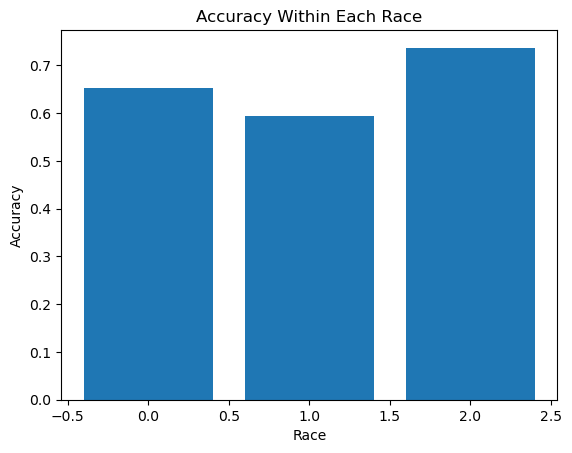

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Undersampling Level 1):

Model accuracy score: 0.7102


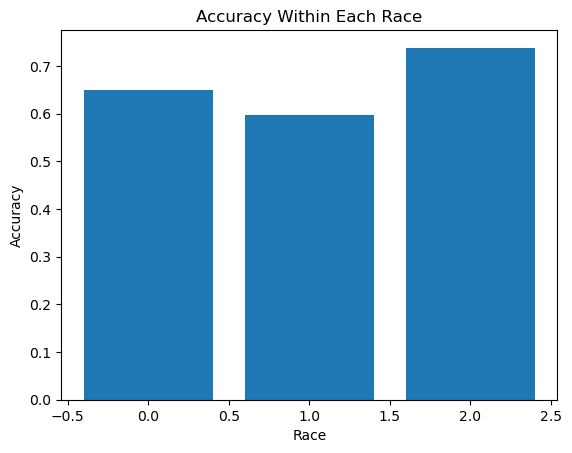

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Undersampling Level 2):

Model accuracy score: 0.7133


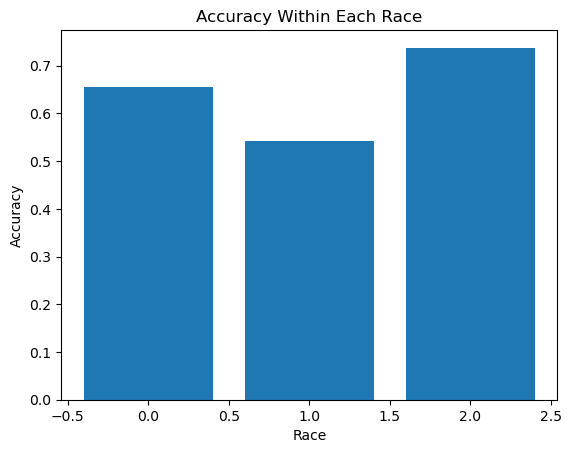

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-3 (Undersampling Level 3):

Model accuracy score: 0.7024


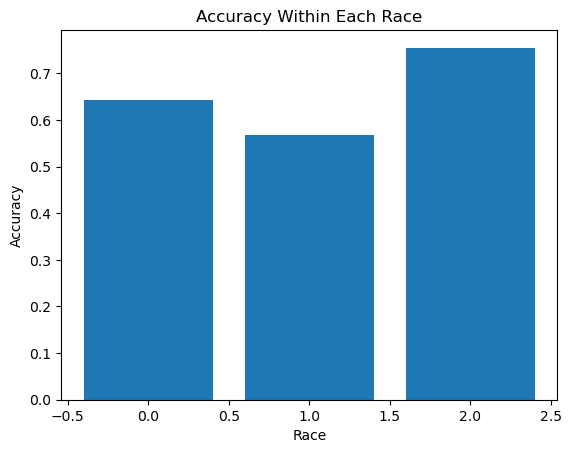

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-4 (Undersampling Level 4):

Model accuracy score: 0.7120


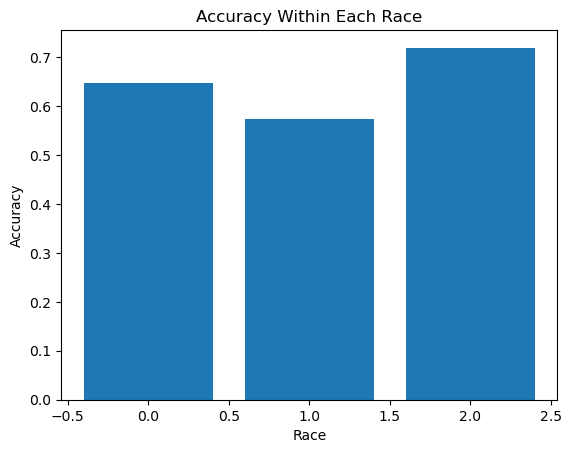

---------------------------------------------------------------------------


In [125]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train_list[i], y_train_list[i])
    pred = clf_knn.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    
    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

## SMOTE

In [130]:
x = training_data.drop(['Race'], axis=1)
y = training_data['Race']

In [127]:
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
194708,0,-0.047999,1,0,0,-0.440025,3.199271,0,0,4,2,0,1,0,-0.753631,0,0,0
58951,0,-1.694216,0,0,0,-0.440025,-0.506278,0,0,5,1,0,0,4,-0.067750,0,0,0
54902,0,-0.041799,0,0,0,0.050880,-0.506278,1,1,8,1,0,1,0,-0.067750,0,0,0
144126,0,-0.551785,0,0,0,-0.194573,-0.506278,1,1,8,2,0,1,4,-0.067750,0,1,0
199798,0,-0.551785,1,0,0,-0.440025,-0.506278,0,0,8,2,0,1,4,-0.067750,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222052,1,-0.850956,0,0,0,-0.440025,-0.506278,0,1,11,2,0,1,4,0.618131,0,0,0
222070,1,2.737549,1,0,0,-0.440025,-0.506278,0,1,9,1,2,1,3,-0.067750,0,0,0
222071,1,-0.514582,0,0,0,-0.440025,-0.506278,1,1,10,1,2,0,0,-0.067750,0,0,0
222094,1,-0.838555,0,0,0,0.787237,1.346496,1,1,12,2,2,1,1,-1.439513,0,1,1


In [145]:
decreased_white = training_data[training_data["Race"] == 2].sample(count_dists[0][0] * 2)
training_data_1 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_1 = training_data_1.sample(frac = 1)

x1 = training_data_1.drop(['Race'], axis=1)
y1 = training_data_1['Race']



decreased_white = training_data[training_data["Race"] == 2].sample(count_dists[0][0] * 4)
training_data_1 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_1 = training_data_1.sample(frac = 1)

x2 = training_data_1.drop(['Race'], axis=1)
y2 = training_data_1['Race']



decreased_white = training_data[training_data["Race"] == 2].sample(count_dists[0][0] * 7)
training_data_1 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_1 = training_data_1.sample(frac = 1)

x3 = training_data_1.drop(['Race'], axis=1)
y3 = training_data_1['Race']



decreased_white = training_data[training_data["Race"] == 2]
training_data_1 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_1 = training_data_1.sample(frac = 1)

x4 = training_data_1.drop(['Race'], axis=1)
y4 = training_data_1['Race']

In [136]:
race_ind = list(training_data.columns).index("Race")

from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x1, y1)

training_data_smote = pd.concat([x_smote.iloc[:, :race_ind], y_smote, x_smote.iloc[:, race_ind: ]], axis=1)

In [137]:
training_data_smote.value_counts("Race")

Race
0    12204
1    12204
2    12204
Name: count, dtype: int64

In [96]:
race_ind = list(training_data.columns).index("Race")

In [129]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

training_data_smote = pd.concat([x_smote.iloc[:, :race_ind], y_smote, x_smote.iloc[:, race_ind: ]], axis=1)

In [131]:
smote_counts = training_data_smote['Race'].value_counts()

In [132]:
smote_counts

Race
2    34502
1    34502
0    34502
Name: count, dtype: int64

In [138]:
X_train_list = [training_data_smote.drop(['HeartDisease'], axis=1)]
y_train_list = [training_data_smote['HeartDisease']]

In [143]:
from sklearn.ensemble import  RandomForestClassifier


---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

36612 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     50374
           1       0.21      0.77      0.33      5155

    accuracy                           0.71     55529
   macro avg       0.59      0.74      0.57     55529
weighted avg       0.90      0.71      0.77     55529



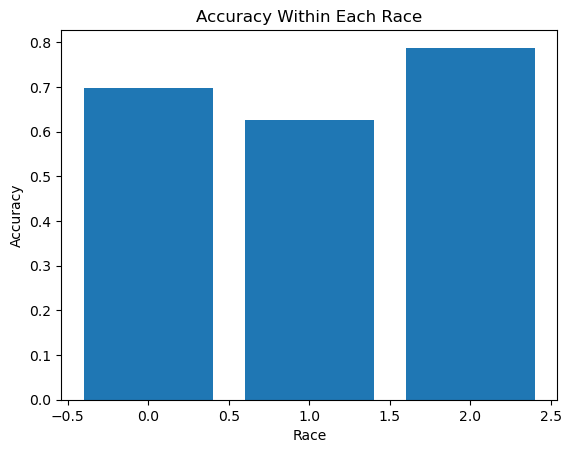

---------------------------------------------------------------------------


In [144]:
for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_RF= RandomForestClassifier().fit(X_train_list[i], y_train_list[i])
        
    pred = clf_RF.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

546354 training examples
[0 0 0 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     50374
           1       0.53      0.10      0.17      5155

    accuracy                           0.91     55529
   macro avg       0.72      0.55      0.56     55529
weighted avg       0.88      0.91      0.88     55529



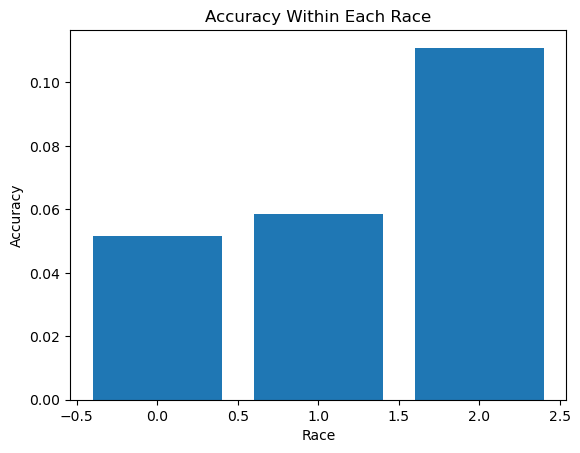

---------------------------------------------------------------------------


In [81]:
for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")